# EMG spectrogram visualization

This notebook shows how to compute the spectrogram of the EMG samples capture by the Myo armband.

NOTE: you need to install the additional library `librosa` to generate the spectrogram plot.

In [11]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

import pandas as pd

In [12]:
import librosa
import matplotlib.pyplot as plt

def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(len(specgram), 1, figsize=(16, 8))

    axs[0].set_title(title or "Spectrogram (db)")

    for i, spec in enumerate(specgram):
        im = axs[i].imshow(librosa.power_to_db(specgram[i]), origin="lower", aspect="auto")
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)

    axs[i].set_xlabel("Frame number")
    axs[i].get_xaxis().set_visible(True)
    plt.show(block=False)

def plot_signal(signal, title=None, ylabel="time"):
    fig, axs = plt.subplots(len(signal), 1, figsize=(16, 8))

    axs[0].set_title(title or "EMG signal")

    for i, sig in enumerate(signal):
        im = axs[i].plot(range(len(sig)), sig)
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)

    axs[i].set_xlabel("time")
    axs[i].get_xaxis().set_visible(True)
    plt.show(block=False)

def plot_general(signal):
    plt.plot(signal)
    plt.show()


In [33]:
# Sampling frequency is 160 Hz
# With 32 samples the frequency resolution after FFT is 160 / 32

n_fft = 32
win_length = None
hop_length = 4

spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    normalized=True
)


def compute_spectrogram(signal, title):
    freq_signal = [spectrogram(signal[:, i]) for i in range(8)]
    plot_spectrogram(freq_signal, title=title)
    return freq_signal

In [34]:
# Replace with your path to one of the subjects from Action-Net
emg_annotations = pd.read_pickle("../../an_data/EMG/S00_2.pkl")

sample_no = 1
signal = torch.from_numpy(emg_annotations.iloc[sample_no].myo_left_readings).float()
title = emg_annotations.iloc[sample_no].description

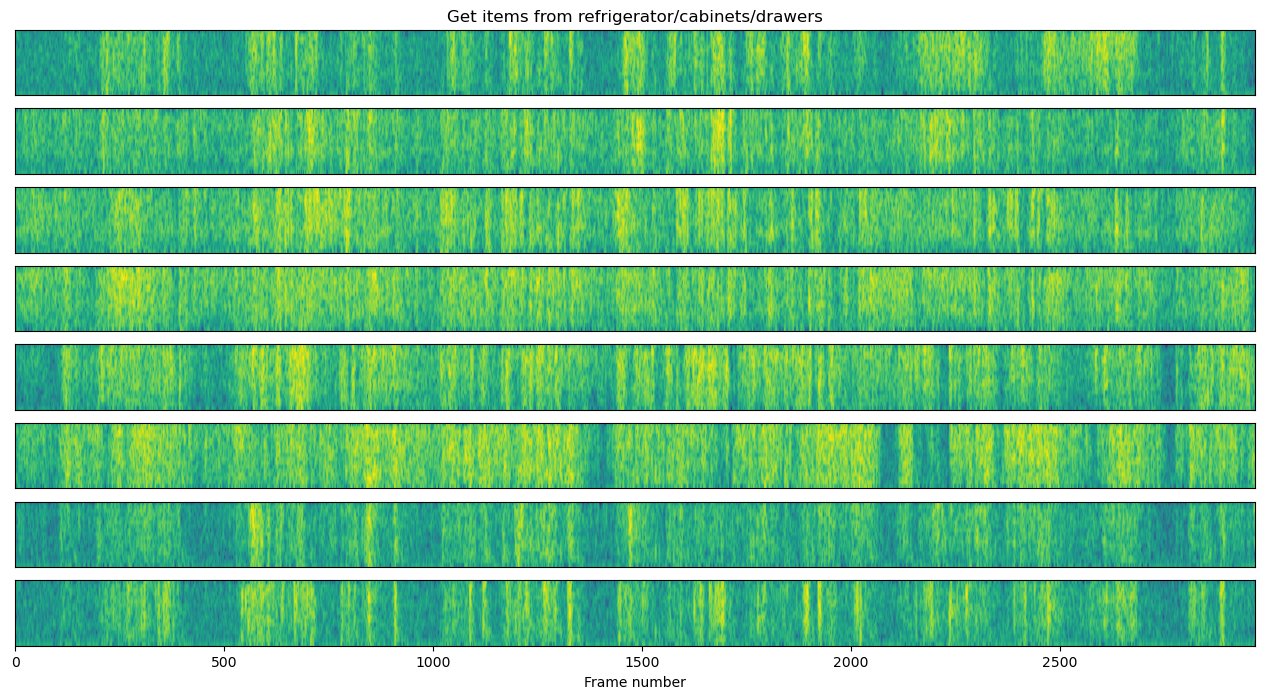

In [35]:
freq = compute_spectrogram(signal, title)


In [36]:
for x in freq:
    print(x.shape)

len(freq)


torch.Size([17, 2968])
torch.Size([17, 2968])
torch.Size([17, 2968])
torch.Size([17, 2968])
torch.Size([17, 2968])
torch.Size([17, 2968])
torch.Size([17, 2968])
torch.Size([17, 2968])


8

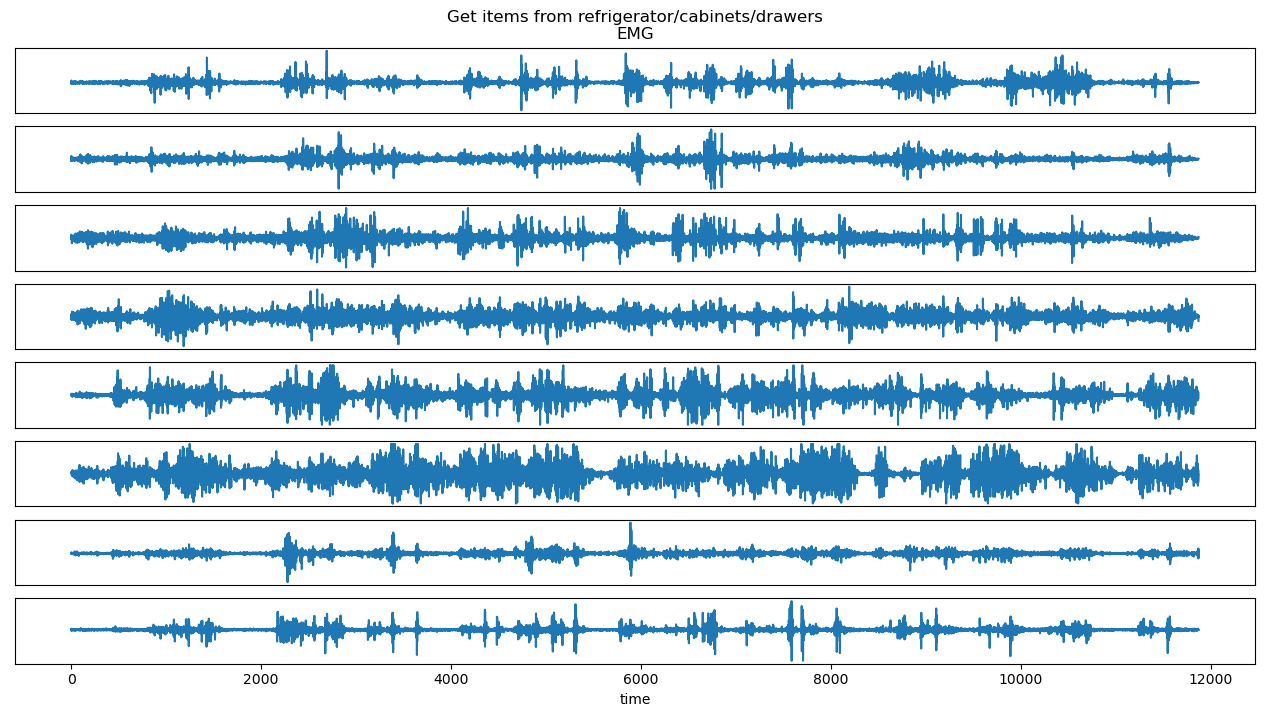

In [37]:
if signal.shape[0] != 8:
    signal = signal.T

plot_signal(signal, title=title + "\nEMG")

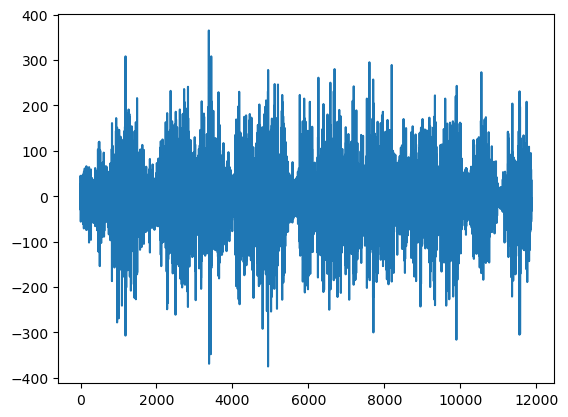

In [38]:
general_signal = torch.sum(signal, axis = 0)

plot_general(general_signal)

In [39]:
freq = spectrogram(general_signal)

In [40]:
freq.size()

torch.Size([17, 2968])

In [42]:
power = librosa.power_to_db(freq)

In [44]:
power.shape

(17, 2968)

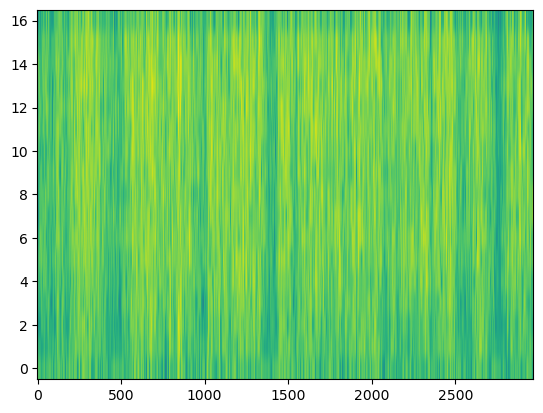

In [41]:
plt.imshow(librosa.power_to_db(freq), origin="lower", aspect="auto")